# Applicatons of Newton's Method

When studying math is can be important to understand how the things we are learning can be applied. The following information is from [Applications: Newton’s Method](https://courses.math.uconn.edu/wp-content/uploads/sites/1169/2019/09/1131-application9-newton-method.pdf) from Math 1131 at the University of Conneticut. 

**Application 1.** Solving nonlinear equations such as Kepler’s equation $a+b sin x =
x$ for constants $a$ and $b$ in celestial mechanics.

**Application 2.** Computing $1 / \sqrt x$ for video games. (This is needed to rescale
vectors to have length 1.)

**Application 3.** For a polynomial $f(x)$ with more than two roots in the complex
numbers, coloring complex numbers by which of the roots of $f(x)$ they go to under
Newton’s method leads to very intricate fractal images. Below is the case of $f(x) =
x^3 − 1$, which has 3 roots in the complex numbers: red points go to the root 1, green
points go to the root $\frac{−1}{2} + (\frac{\sqrt 3}{2})i$ and blue points go to the root $\frac{−1}{2} − (\frac{
\sqrt 3}{2})i$.
Fractal images associated to other polynomials and transcendental functions are [here](https://en.wikipedia.org/wiki/Newton_fractal).
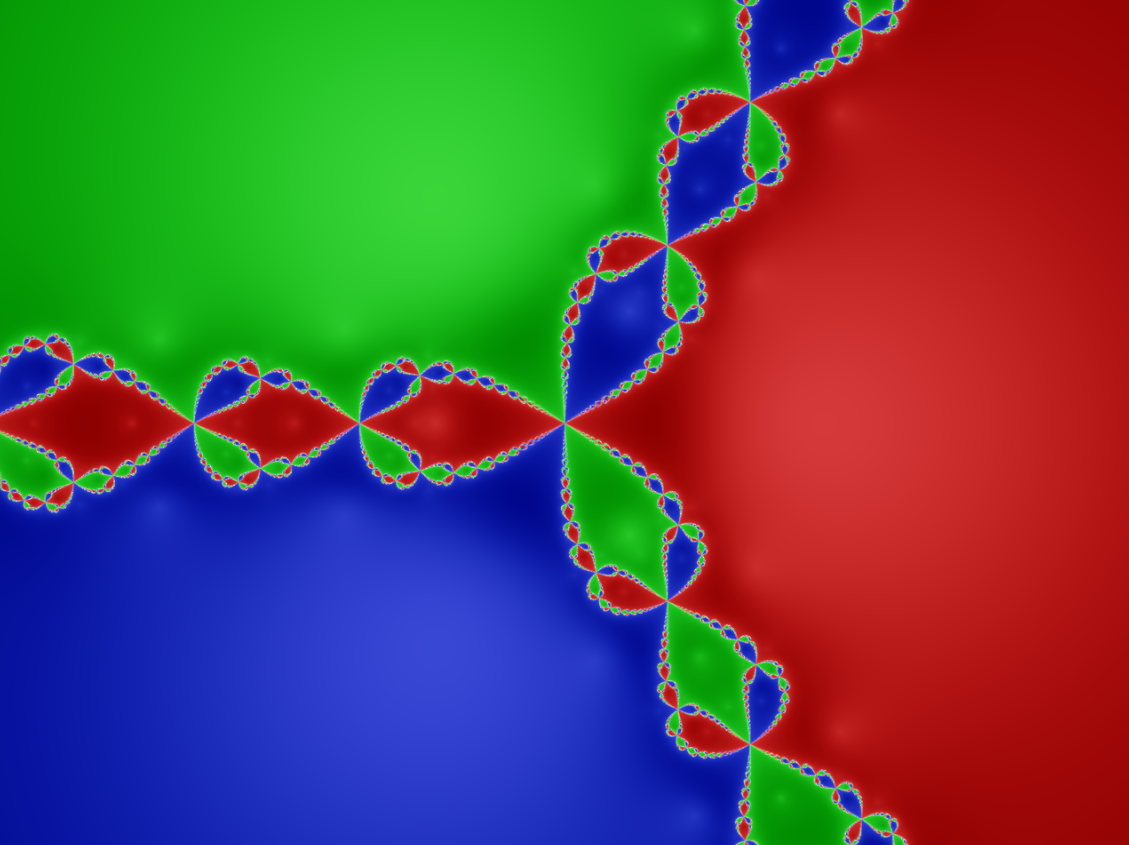

Equations arising in practical applications often involve many variables, not just
one, and you can’t graph equations in lots of variables, so there is no way to graph
the equations in order to see the solution. But there is a version of Newton’s method
based on multivariable calculus (and linear algebra) for solving systems of nonlinear
equations in several variables, and when it works it tends to do so quickly, just like
in one variable. Here are a few applications of the multivariable Newton’s method:

**Application 4.** Solve equations that occur in GPS calculations.

**Application 5.** Inverse kinematic problems (robotics, video game animation).

**Application 6.** Multivariable optimization problems are solved with a higherdimensional analogue of the equation $f'(x) = 0$, which is a type of equation to which Newton’s method can be used.

Most equations do not have direct formulas for their solutions. This is why it’s
important to appreciate the idea of an iterative solution method, of which there are
many “named” examples. We have seen Newton’s method. Here are some more:
1. gradient descent for finding the minimum of a function,
2. Gauss–Seidel method for solving systems of linear equations,
3. k-means clustering in data mining,
4. Runge–Kutta method for solving differential equations.

## Quake's Fast Inverse Square Root

To better understand how this works we are going to take a look at Application number 2, computing the inverse square root.
This information comes from the 
[Understanding Quake’s Fast Inverse Square Root](https://betterexplained.com/articles/understanding-quakes-fast-inverse-square-root/)
which itself relies on a further research paper and article.

### Quake
Quake, released in 1996, is a fast-paced first-person shooter (FPS) from id Software, the same developers behind Doom.  It takes inspiration from dark fantasy and horror, with the player character, a Ranger, battling monsters across creepy, maze-like levels.  The story involves stopping an evil force called Quake that's using teleportation portals to invade Earth from other dimensions.  Quake was a major influence on the FPS genre, known for its innovative 3D graphics, intense action, and groundbreaking online multiplayer mode.

### Use of Inverse Square Roots
Imagine you're playing a racing game. How bright the car headlights appear in the distance depends on how far away they are, right? The closer they are, the brighter they seem. This effect is because light weakens as it spreads out further, kind of like a spotlight getting dimmer the wider you open it.

Video games use math to create realistic lighting effects like this. One way to calculate how bright something should appear is with an inverse square root. It's a fancy way of saying how strong something is after considering distance.

Here's the basic idea: suppose you have a light source and you want to know how bright it appears at a certain distance. You can take the distance and use the inverse square root function on it. The bigger the distance, the smaller the result from the inverse square root, making the light appear dimmer in the game.

This applies to more than just light. Imagine throwing a rock in a pond. Ripples spread out from the splash point, weakening as they go. Video games use similar math to show how sound effects or water ripples weaken over distance, making them quieter or calmer the farther away you get.

Overall, inverse square roots are a handy tool for game developers to make the game world feel more realistic by considering how things like light and sound weaken with distance, just like they do in our real world.

### Manual Computation of Inverse Square Roots
Long division method (for exact answers):

This is a traditional method for finding the square root by hand. It involves repeated division and estimation, and can be a bit tedious for large numbers. Here's a simplified overview:

- Set up the long division format, with the number you want to find the square root of as the dividend (top number).
- Divide the dividend by the largest single-digit number squared that is less than or equal to the first one or two digits of the dividend (depending on the number). This gives you the first digit of the square root and a remainder.
- Bring down the next two digits of the dividend (or more if needed) next to the remainder, creating a new number.
- Consider this new number along with the previous remainder.
- Continue dividing this new number by twice the quotient you obtained in the first step (basically, double the first digit of - the square root you found) appended with a digit you need to estimate to get the largest possible two-digit number that divides into the new number without going over. This digit you estimate will be the next digit of the square root.
- Repeat these steps (bringing down more digits, adjusting the divisor based on the quotient, and estimating the next digit of the square root) until you reach your desired precision.

#### Example
Below are the steps explained to find √5:

- Write number 5 as 5.00000000
- Take the number whose square is less than 5. Hence, 22 = 4 and 4<5
- Divide 5 by such that when 2 multiplied by 2 gives 4. Subtract 4 from 5, you will get the answer 1.
- Take two 0 along with 1 and take the decimal point after 1 in the quotient.
- Now add 2 in the divisor to make it 4. Take a number next to 4, such that when we multiply with the same as a whole, then it results in the value less than or equal to 100. Hence, 42 x 2 = 84 is less than 100.
- Now write it below 100 and subtract it from 100 to get the remainder.
- Next remainder is 16
- Again carry down two pairs of zero and repeat step 5 up to 4 places of decimals.
- Finally, you get the answer as 2.2360…
- You can repeat the method further.

**Imagine having to do this millions of times per second and then having to get the inverse!**

## A Novel Solution

The engineers at id Software came up with a solution using only multiplication and bit shifts __(more on this later.)__

To make the guess, it takes floating-point number in scientific notation, and negates & halves the exponent to get something close the the inverse square root. It then runs a round of Newton's approximation method to further refine the estimate and tada, we've got something near the inverse square root.

### C Code
```c
    float InvSqrt(float x){
        float xhalf = 0.5f * x;
        int i = *(int*)&x;            // store floating-point bits in integer
        i = 0x5f3759df - (i >> 1);    // initial guess for Newton's method
        x = *(float*)&i;              // convert new bits into float
        x = x*(1.5f - xhalf*x*x);     // One round of Newton's method
        return x;
    }
```

### What is a bit shift?
The bit shift `>>` is an operation that shifts the bits of a binary number the desired number of places in the direction indicated. For an integer number represented in 2's compliment this would result in halving the number. When applied to a positive floating point number in IEEE 745 format it has the result of halving both the mantissa and exponent of the number. 

### The Magic Number and Initial Guess
Surprisingly the engineers found subtracting this number from 0x5f3759df made a good initial guess for Newton's method. Are you curious about this [magic number](https://breq.dev/2021/03/17/5F3759DF)?

### Newton's Method Iteration
Only one line is used for a single iteration of Newton's Method. `x = x*(1.5f - xhalf*x*x);`.

## Example
In the code below it takes a significantly larger amount of work to move the number in and out of the IEEE 745 single precision number format simply because Python uses the double preceision format. There is probably a better way to accomplish this goal.

In [46]:
from math import sqrt
from ieee754 import single

# Converting back from an IEEE 745 Single Precision number
# requires converting the bits of the exponent and mantissa
# to integers and then reconstituting the floating point 
# number.
def ieee745(N): # ieee-745 bits (max 32 bit)
    a = int(N[0])        # sign,     1 bit
    b = int(N[1:9],2)    # exponent, 8 bits
    c = int("1"+N[9:], 2)# fraction, len(N)-9 bits

    return (-1)**a * c /( 1<<( len(N)-9 - (b-127) ))


# The method as implemented is only a demonstration and is,
# in fact, very slow due to the need to convert to IEEE 754 
# single precision format and back through string operations. 
def invSqrt(x):
    x_half = 0.5 * x
    i = int(single(x).hex()[0],16)    # store floating-point bits in integer 
    i = 0x5f3759df - (i >> 1)         # initial guess for Newton's method
    x = ieee745("{0:032b}".format(i)) # convert new bits into float
    x = x*(1.5 - x_half*x*x)          # One round of Newton's method
    return x

print(invSqrt(54))
print(1/sqrt(54))
print("Similar result: ", abs(invSqrt(337.60) - 1/sqrt(337.60)) < 0.001)

0.13608276343190193
0.13608276348795434
Similar result:  True
